In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)




170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

inpt_dim = (32, 32, 3)
inpt_img = Input(shape=inpt_dim)
cl1 = Conv2D(64, (9, 9), strides=(2, 2), input_shape = inpt_dim, 
             activation = 'relu')(inpt_img)
pl2 = MaxPooling2D(pool_size = (2, 2))(cl1)
bnl3 = BatchNormalization()(pl2)
cl4 = Conv2D(128, (3, 3), strides=(1, 1), activation = 'relu')(bnl3)
pl5 = MaxPooling2D(pool_size = (2, 2))(cl4)
bnl6 = BatchNormalization()(pl5)
fl7 = Flatten()(bnl6)
dol8 = Dropout(0.5)(fl7)
dl9 = Dense(units = 256, activation = 'relu')(dol8)
dol10 = Dropout(0.2)(dl9)
dl11 = Dense(units = 64, activation = 'relu')(dol10)
dol12 = Dropout(0.1)(dl11)
output = Dense(units = 10, activation = 'sigmoid')(dol12)
classifier = Model(inpt_img, output)
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])
print(classifier.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 64)        15616     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 128)         512   

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))


Epoch 1/1000
500/500 [==============================] - 37s 14ms/step - loss: 0.2770 - accuracy: 0.3524 - val_loss: 0.2511 - val_accuracy: 0.4384
Epoch 2/1000
500/500 [==============================] - 6s 12ms/step - loss: 0.2287 - accuracy: 0.4780 - val_loss: 0.2493 - val_accuracy: 0.4234
Epoch 3/1000
500/500 [==============================] - 6s 12ms/step - loss: 0.2095 - accuracy: 0.5307 - val_loss: 0.2069 - val_accuracy: 0.5277
Epoch 4/1000
500/500 [==============================] - 5s 11ms/step - loss: 0.1981 - accuracy: 0.5615 - val_loss: 0.2095 - val_accuracy: 0.5273
Epoch 5/1000
500/500 [==============================] - 5s 11ms/step - loss: 0.1881 - accuracy: 0.5848 - val_loss: 0.1889 - val_accuracy: 0.5792
Epoch 6/1000
500/500 [==============================] - 5s 11ms/step - loss: 0.1809 - accuracy: 0.6033 - val_loss: 0.2189 - val_accuracy: 0.5243
Epoch 7/1000
500/500 [==============================] - 5s 10ms/step - loss: 0.1742 - accuracy: 0.6218 - val_loss: 0.2430 - val_a

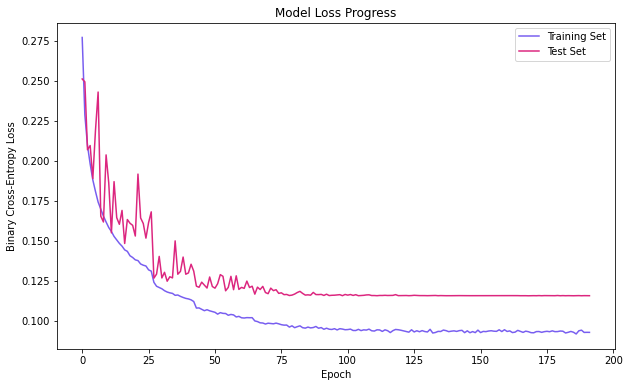

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()


In [ ]:
test_loss, test_acc = classifier.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.1157 - accuracy: 0.7584
0.758400022983551
